In [2]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")
# Substitui valores 0 por NaN em PIB_PerCapita (para evitar distorções nas análises)
dados['PIB_PerCapita'] = dados['PIB_PerCapita'].replace(0, np.nan)


warnings.filterwarnings("ignore")

#dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

# 🟤 **Regressão - Economia e Empregabilidade**

Nesta etapa, a equipe deu continuidade à análise dos dados por meio da aplicação de regressão linear, com o objetivo de investigar as relações entre variáveis econômicas e indicadores de empregabilidade. Este documento tem como propósito aprofundar a compreensão dessas relações, avaliando a significância estatística das variáveis explicativas e seu impacto sobre o PIB per capita. Para isso, foram realizados testes e análises que permitem identificar quais fatores têm maior influência e contribuem para explicar a variação do PIB per capita nos municípios, possibilitando assim tirar conclusões fundamentadas a partir dos dados disponíveis.


Durante a aplicação da inferência estatística, foi formulada uma nova pergunta para verificar se existe alguma relação entre o PIB per capita dos municípios e a proporção de pessoal assalariado. Após a realização do teste t de Welch nos dados,foi identificada uma diferença significativa no PIB per capita entre municípios com diferentes proporções de pessoal assalariado. No entanto, o teste não esclarece como essa relação se manifesta. Para aprofundar essa análise, a equipe aplicou a regressão linear para investigar a relação entre essas variáveis e avaliar se a proporção de pessoal assalariado pode explicar a variação do PIB per capita, além de investigar se outros fatores também influenciam o PIB per capita.


###🔹 Regressão Linear Simples com Proporção de Pessoal Assalariado



Inicialmente, para investigar a existência de uma possível relação linear entre a proporção de pessoal assalariado e o PIB per capita dos municípios, foi realizada uma regressão linear simples utilizando o modelo **LinearRegression**. Nesse modelo, a variável independente (X) escolhida foi a proporção de pessoal assalariado, pois buscamos entender como essa característica poderia influenciar o PIB per capita, que foi a variável dependente (Y). Foram calculados o coeficiente angular, o intercepto e o coeficiente de determinação (R²) para interpretar o grau e a direção da relação entre as variáveis. Para complementar a análise, também foi gerado um gráfico de dispersão com a linha de regressão ajustada, facilitando a visualização do padrão de relacionamento entre as duas variáveis.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

dados_limpos = dados[
    (dados['Proporcao_PessoalAssalariado'] <= 1) &
    (~dados['Proporcao_PessoalAssalariado'].isna()) &
    (~dados['PIB_PerCapita'].isna())
][['Proporcao_PessoalAssalariado', 'PIB_PerCapita']]


x = dados_limpos[['Proporcao_PessoalAssalariado']]
y = dados_limpos['PIB_PerCapita']

modelo = LinearRegression()
modelo.fit(x, y)

coef = modelo.coef_[0]
intercept = modelo.intercept_
r2 = modelo.score(x, y)

print(f"Coeficiente: {coef:.4f}")
print(f"Intercepto: {intercept:.4f}")
print(f"R²: {r2:.4f}")




Coeficiente: -34.9175
Intercepto: 53.1575
R²: 0.0109


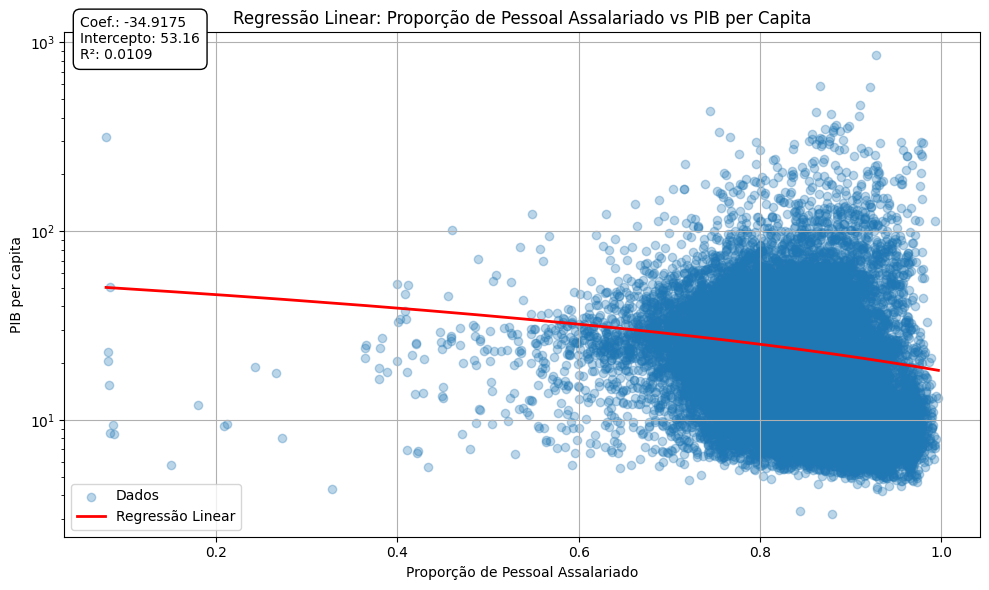

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, label='Dados')

x_sorted = np.sort(x.values.ravel())
y_pred_sorted = modelo.predict(x_sorted.reshape(-1, 1))


plt.plot(x_sorted, y_pred_sorted, color='red', label='Regressão Linear', linewidth=2)


plt.text(
    0.05, y.max()*0.95,
    f'Coef.: {coef:.4f}\nIntercepto: {intercept:.2f}\nR²: {r2:.4f}',
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)


plt.xlabel('Proporção de Pessoal Assalariado')
plt.ylabel('PIB per capita')
plt.title('Regressão Linear: Proporção de Pessoal Assalariado vs PIB per Capita')
plt.legend()
plt.grid(True)

plt.yscale('log')

plt.tight_layout()
plt.show()

###🔹Interpretação dos Resultados

Com um coeficiente de -34,92 e intercepto de 53,16, a regressão linear sugere que, à medida que a proporção de pessoal assalariado aumenta em uma unidade (de 0 a 1), o PIB per capita tende a diminuir, em média, cerca de 34,92 unidades. No entanto, o valor de R² igual a 0,0109 indica que apenas cerca de 1,1% da variação do PIB per capita é explicada pela proporção de pessoal assalariado, o que evidencia uma relação fraca entre as variáveis. Isso significa que, embora exista uma inclinação negativa na reta de regressão, ela não representa bem a tendência dos dados, e outros fatores provavelmente têm influência mais significativa sobre o PIB per capita. Portanto, essa variável isolada não é suficiente para explicar variações relevantes no PIB per capita dos municípios analisados.


### 🔹 Regressão Linear Multivariada

Após a aplicação da regressão linear simples entre a proporção de pessoal assalariado e o PIB per capita, os resultados indicaram uma relação praticamente inexistente entre essas variáveis, com um coeficiente de determinação R² próximo de zero. Isso sugeriu que a proporção de pessoal assalariado isoladamente não é suficiente para explicar as variações no PIB per capita dos municípios.

Diante disso, optou-se por aprofundar a investigação por meio de uma regressão linear múltipla, incorporando outras variáveis que poderiam estar relacionadas ao desempenho econômico municipal. As variáveis escolhidas como independentes (X) foram:


*   Proporção de Pessoal Assalariado
*   Importações (US\$)
*   Exportações (US\$)
*   Área Plantada (hectares)
*   Transferências Correntes (R\$)

Essas variáveis foram selecionadas por representarem aspectos econômicos relevantes,fatores que potencialmente influenciam o PIB per capita. A variável dependente (Y) permaneceu sendo o PIB per capita.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

colunas = ['Proporcao_PessoalAssalariado', 'Importacoes_US$', 'AreaPlantada_h', 'Exportacoes_US$', 'Transferencias_correntes_R$']

dados_filtrados = dados[
    (dados['Proporcao_PessoalAssalariado'] <= 1) &
    dados[colunas + ['PIB_PerCapita']].notna().all(axis=1)
]

x_mult = dados_filtrados[colunas]
y = dados_filtrados['PIB_PerCapita']


modelo_mult = LinearRegression()
modelo_mult.fit(x_mult, y)

r2_mult = modelo_mult.score(x_mult, y)
coef_mult = dict(zip(colunas, modelo_mult.coef_))

print(f"R² multivariado: {r2_mult}")
print("Coeficientes:")
for var, coef in coef_mult.items():
    print(f"  {var}: {coef}")


R² multivariado: 0.11073311394696661
Coeficientes:
  Proporcao_PessoalAssalariado: -31.996974018904588
  Importacoes_US$: 1.7242339073562305e-08
  AreaPlantada_h: 0.005438187315400743
  Exportacoes_US$: 9.720559584527906e-09
  Transferencias_correntes_R$: -5.103664844247358e-09


###🔹Interpretação dos Resultados


Com um R² multivariado de aproximadamente 0,11, o modelo consegue explicar apenas cerca de 11% da variação no PIB per capita a partir das variáveis analisadas. Isso indica que, embora tenha havido um leve ganho em relação ao modelo univariado anterior, ainda há muita variabilidade não explicada por essas variáveis — sugerindo que outros fatores (possivelmente sociais, educacionais, de infraestrutura etc.) podem ser mais relevantes para explicar o PIB per capita. Entre os coeficientes, destaca-se a proporção de pessoal assalariado com um impacto negativo mais expressivo, indicando que, controladas as demais variáveis, quanto maior essa proporção, menor tende a ser o PIB per capita — o que pode refletir distorções ou peculiaridades do mercado de trabalho em algumas regiões.



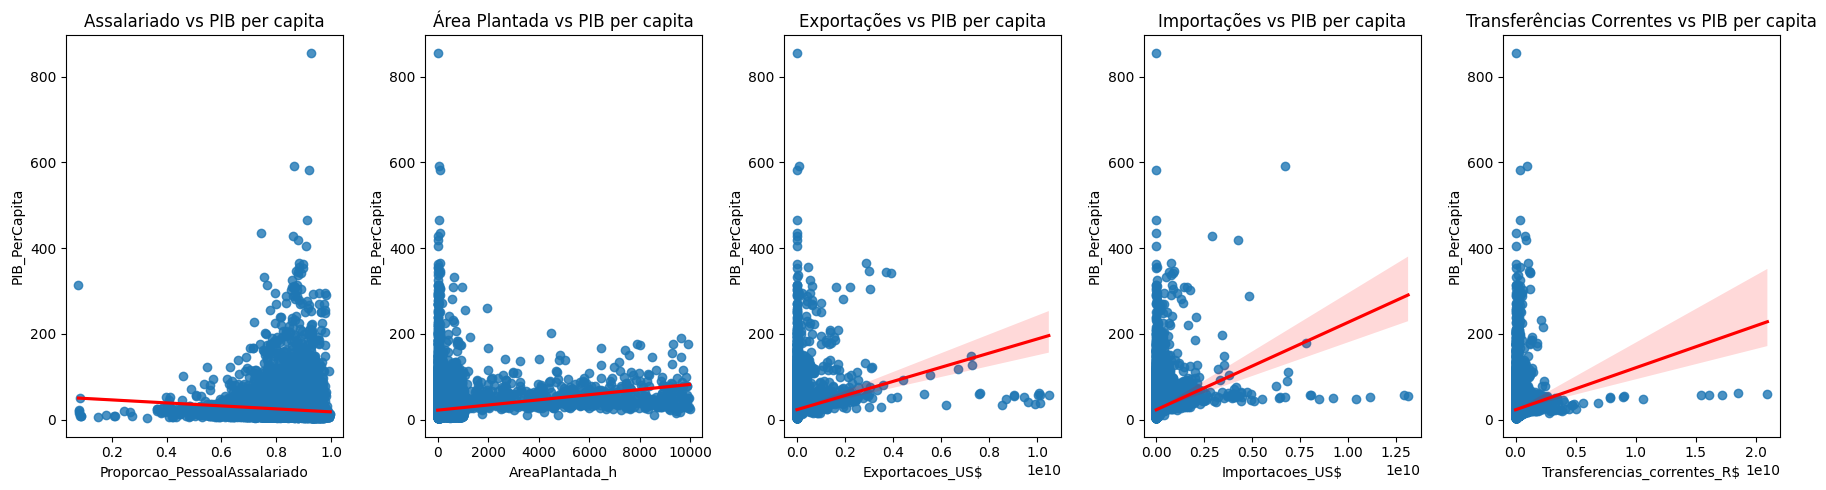

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

sns.regplot(x='Proporcao_PessoalAssalariado', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[0], line_kws={'color': 'red'})
axes[0].set_title('Assalariado vs PIB per capita')

sns.regplot(x='AreaPlantada_h', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[1], line_kws={'color': 'red'})
axes[1].set_title('Área Plantada vs PIB per capita')

sns.regplot(x='Exportacoes_US$', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[2], line_kws={'color': 'red'})
axes[2].set_title('Exportações vs PIB per capita')

sns.regplot(x='Importacoes_US$', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[3], line_kws={'color': 'red'})
axes[3].set_title('Importações vs PIB per capita')

sns.regplot(x='Transferencias_correntes_R$', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[4], line_kws={'color': 'red'})
axes[4].set_title('Transferências Correntes vs PIB per capita')

plt.tight_layout()
plt.show()


## 🔹 Conclusão

No modelo simples, a proporção de pessoal assalariado apresenta um coeficiente negativo de -34,92, sugerindo que, isoladamente, quanto maior essa proporção, menor tende a ser o PIB per capita, em média, em cerca de 34,92 unidades para cada aumento unitário na proporção. Porém, o valor de R² de apenas 0,0109 indica que essa variável explica somente cerca de 1,1% da variação do PIB per capita, evidenciando uma relação fraca e insuficiente para explicar significativamente o desempenho econômico dos municípios. Já no modelo multivariado, que considera várias variáveis simultaneamente, o R² sobe para aproximadamente 0,11, mostrando um leve ganho explicativo, mas ainda assim indicando que apenas 11% da variação no PIB per capita é explicada pelos fatores analisados. Isso sugere que outras variáveis importantes — possivelmente sociais, educacionais, de infraestrutura, entre outras — influenciam de forma mais significativa o PIB per capita, e que os modelos atuais não capturam toda a complexidade do fenômeno econômico municipal.


## 🔹 Análise da Hipótese Contraintuitiva

Após a realização da regressão linear univariada, foi observado um coeficiente de determinação (R²) muito baixo, além de um resultado contraintuitivo: o modelo indicava que, conforme a proporção de pessoal assalariado aumenta, o PIB per capita tende a diminuir. Espera-se, em geral, que essas variáveis estejam positivamente associadas — ou seja, que regiões com maior PIB per capita apresentem também maior formalização do trabalho.

Para explorar essa relação com mais profundidade e investigar possíveis causas para esse comportamento inesperado, como a influência da distribuição dos dados, foram realizados alguns testes adicionais, apresentados a seguir.

Inicialmente, foram plotados boxplots para visualizar a distribuição da proporção de assalariados e do PIB per capita. A análise gráfica revelou que ambas as variáveis apresentavam uma quantidade considerável de outliers, principalmente valores elevados, o que pode distorcer os resultados da regressão. Diante disso, optou-se por aplicar novamente a regressão linear, desta vez removendo os valores extremos em ambas as variáveis. Para isso, foram utilizados os percentis 1% e 99% como limites, garantindo que os dados considerados estivessem dentro de uma faixa mais representativa da distribuição real.

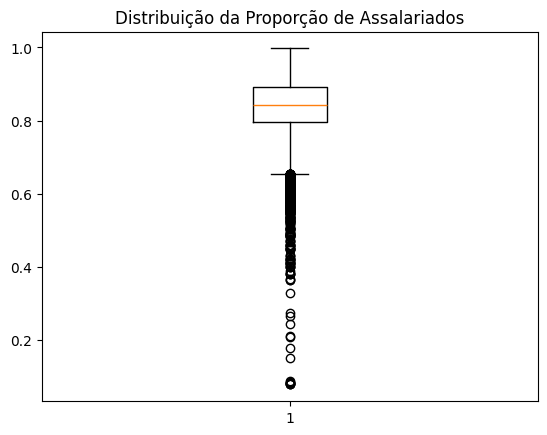

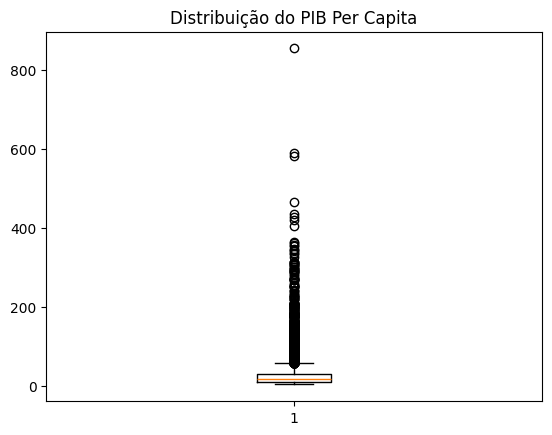

In [ ]:
plt.boxplot(dados_limpos['Proporcao_PessoalAssalariado'])
plt.title('Distribuição da Proporção de Assalariados')
plt.show()

plt.boxplot(dados_limpos['PIB_PerCapita'])
plt.title('Distribuição do PIB Per Capita')
plt.show()


In [ ]:
q_low_pib = dados_limpos['PIB_PerCapita'].quantile(0.01)
q_high_pib = dados_limpos['PIB_PerCapita'].quantile(0.99)

q_low_assal = dados_limpos['Proporcao_PessoalAssalariado'].quantile(0.01)
q_high_assal = dados_limpos['Proporcao_PessoalAssalariado'].quantile(0.99)

dados_filtrados = dados_limpos[
    (dados_limpos['PIB_PerCapita'] >= q_low_pib) & (dados_limpos['PIB_PerCapita'] <= q_high_pib) &
    (dados_limpos['Proporcao_PessoalAssalariado'] >= q_low_assal) & (dados_limpos['Proporcao_PessoalAssalariado'] <= q_high_assal)
]
x_filtrado = dados_filtrados[['Proporcao_PessoalAssalariado']]
y_filtrado = dados_filtrados['PIB_PerCapita']

modelo_filtrado = LinearRegression()
modelo_filtrado.fit(x_filtrado, y_filtrado)

print(f"Coeficiente sem outliers: {modelo_filtrado.coef_[0]:.4f}")
print(f"R² sem outliers: {modelo_filtrado.score(x_filtrado, y_filtrado):.4f}")


Coeficiente sem outliers: -51.0343
R² sem outliers: 0.0419


Removendo os outliers em ambas as variáveis, o coeficiente negativo se intensificou e o modelo passou a explicar cerca de 4,2% da variação do PIB per capita. Isso indica que a relação negativa é consistente e não foi causada exclusivamente por valores extremos. O leve aumento no R² demonstra uma melhora no ajuste do modelo, embora a proporção de assalariados ainda se mostre um preditor fraco quando considerada isoladamente.

Na sequência, os dados foram divididos em quatro faixas (quartis) com base na proporção de assalariados, a fim de analisar as médias e medianas do PIB per capita em cada grupo. Os resultados mostraram que a mediana acompanha a tendência de queda das médias, reforçando que a diminuição do PIB per capita à medida que aumenta a proporção de assalariados é consistente e não se deve apenas à presença de outliers.

In [ ]:
import pandas as pd

dados_filtrados['faixa'] = pd.qcut(dados_filtrados['Proporcao_PessoalAssalariado'], 4)
media_pib = dados_filtrados.groupby('faixa')['PIB_PerCapita'].mean()
mediana_pib = dados_filtrados.groupby('faixa')['PIB_PerCapita'].median()

print("Médias do PIB Per Capita por faixa:")
print(media_pib)
print("\nMedianas do PIB Per Capita por faixa:")
print(mediana_pib)


Médias do PIB Per Capita por faixa:
faixa
(0.616, 0.797]    26.112734
(0.797, 0.842]    24.551701
(0.842, 0.888]    21.885497
(0.888, 0.97]     17.134686
Name: PIB_PerCapita, dtype: float64

Medianas do PIB Per Capita por faixa:
faixa
(0.616, 0.797]    22.720595
(0.797, 0.842]    21.303569
(0.842, 0.888]    15.703480
(0.888, 0.97]     10.616772
Name: PIB_PerCapita, dtype: float64



Em seguida, foi calculada a correlação e a significância estatística da relação entre as variáveis. O resultado indicou uma correlação negativa e fraca, mas estatisticamente significativa, devido ao p-valor extremamente baixo. Isso significa que, embora a força da associação seja pequena, há evidência suficiente para afirmar que a relação observada não ocorreu por acaso.




In [ ]:
from scipy.stats import pearsonr

corr, pval = pearsonr(x.values.flatten(), y)
print(f"Correlação: {corr:.4f}, p-valor: {pval}")


Correlação: -0.1043, p-valor: 4.6469707090184806e-68


###🔹Interpretação dos Resultados

Apesar de a formalização do trabalho — representada pela proporção de assalariados — ser geralmente associada ao crescimento econômico, os dados analisados revelaram uma relação negativa com o PIB per capita. Essa associação pode estar relacionada a fatores como a precarização de vínculos formais, a composição setorial e regional menos produtiva, ou até mesmo à presença de atividades informais mais lucrativas em regiões com menor formalização. Ainda que o modelo apresente um R² baixo, indicando que a proporção de assalariados, isoladamente, explica pouco da variação do PIB per capita, os testes estatísticos mostram que a relação observada não é fruto do acaso. Isso reforça que existe uma associação real nos dados, embora complexa e influenciada por variáveis não contempladas no conjunto analisado. Assim, estudos futuros com modelos multivariados e dados mais amplos são recomendados para compreender essa dinâmica com maior profundidade.

# 🔹 Regressão Linear: Transferências de Capital vs Empregos nos municípios

Com o intuito de compreender melhor as concepções acerca do questionamento: "**De que maneira o investimento público nos Municípios afeta a empregabilidade destes? Cidades que recebem mais transferências (dinheiro) geram mais empregos?**", a equipe optou pela aplicação de uma regressão linear. Assim, isso fortalece a análise da pergunta e, consequentemente, auxilia na busca por respostas plausíveis.

Por isso, aplicou-se a Regressão Linear entre Transferências de Capital vs Empregos, com o objetivo de compreender se, quanto mais dinheiro público um município recebe, mais empregos ele gera.
*   Variável independente: **Transferencias_capital_R$** 💸
*   Variável dependente: **PessoalOcupado** 👷



In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Filtrando valores positivos (log de zero ou negativo não existe)
dados_limpos = dados[['Transferencias_capital_R$', 'PessoalOcupado']].dropna()
dados_limpos = dados_limpos[(dados_limpos['Transferencias_capital_R$'] > 0) & (dados_limpos['PessoalOcupado'] > 0)]

# Transformação logarítmica
log_X = np.log(dados_limpos['Transferencias_capital_R$'])
log_y = np.log(dados_limpos['PessoalOcupado'])

X_log = log_X.values.reshape(-1, 1)
y_log = log_y.values

# Regressão linear com dados transformados
lm_log = LinearRegression()
lm_log.fit(X_log, y_log)
y_pred_log = lm_log.predict(X_log)

# Impressão dos resultados
print("=== Regressão (COM TRANSFORMAÇÃO LOGARÍTMICA)")
print("Coeficiente estimado: ", lm_log.coef_[0])
print("Intercepto:", lm_log.intercept_)
print("R²:", lm_log.score(X_log, y_log))

=== Regressão (COM TRANSFORMAÇÃO LOGARÍTMICA)
Coeficiente estimado:  0.4848070803667095
Intercepto: 0.7457076724684013
R²: 0.22778140752139298


Aplicando a Regressão Linear entre os atributos, pode-se notar que fora obtido um coeficiente estimado que estabelece a seguinte relação:
- Para cada 1% de aumento nas transferências de capital, o município tende a ter um aumento de aproximadamente 0,48% no número de pessoas ocupadas.

Com relação ao Coeficiente de Determinação, o que pode ser afirmado é que aproximadamente 22,8% da variação do número de pessoas ocupadas nas cidades pode ser explicada pela variação das transferências de capital. Embora este valor seja relativamente baixo, ele pode indicar que outros fatores também são responsáveis pelo aumento da empregabilidade em um dado município.

Nesse sentido, fora plotado um gráfico para que essa relação também possa ser visualizada de uma maneira melhor.

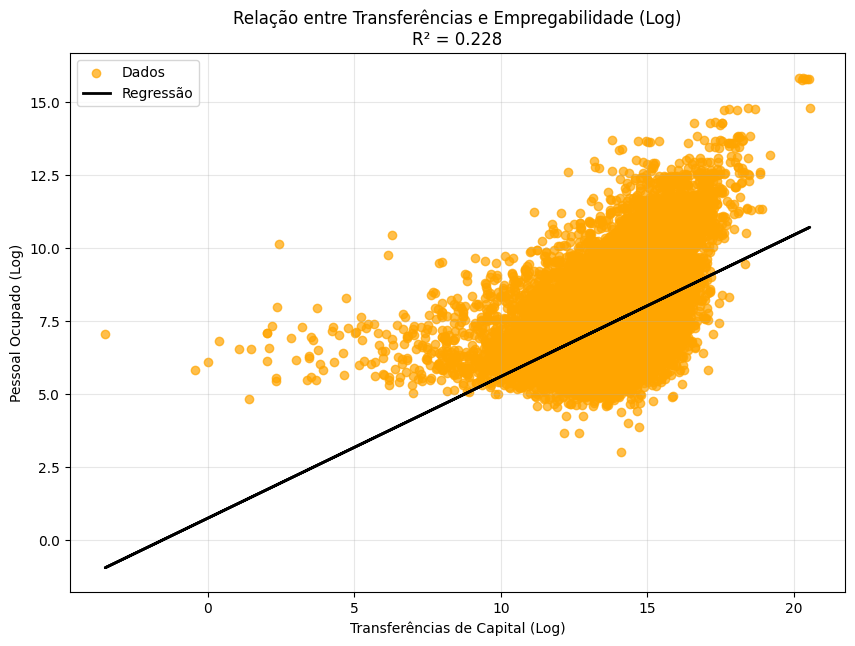

In [39]:
# Gráfico
plt.figure(figsize=(10, 7))
plt.scatter(X_log, y_log, color='orange', alpha=0.7, label='Dados')
plt.plot(X_log, y_pred_log, color='black', linewidth=2, label='Regressão')

plt.xlabel('Transferências de Capital (Log)')
plt.ylabel('Pessoal Ocupado (Log)')
plt.title(f'Relação entre Transferências e Empregabilidade (Log)\nR² = {lm_log.score(X_log, y_log):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


O que pode ser observado é que o gráfico acima apresenta a distribuição dos dados entre as transferências de capital recebidas pelos municípios e o número de pessoas ocupadas, juntamente com a reta de regressão linear. Analisando,tem-se uma relação moderada, indicando que maiores transferências públicas tendem a estar associadas a um aumento no nível de emprego. Contudo, observa-se também uma dispersão considerável dos pontos, o que indica que outros fatores não incluídos no modelo têm influência significativa na determinação dos níveis de emprego municipal.

O uso da escala logarítmica no gráfico também permite visualizar melhor a relação proporcional entre as variáveis, mostrando que pequenos municípios com baixas transferências podem ter ganhos relativamente maiores em emprego quando recebem investimentos adicionais.

Por fim, o que se pode concluir acerca da Regressão aplicada é que o modelo sugere uma relação, de certa forma, moderada entre os investimentos públicos feitos em um município e o seu nível de empregabilidade. Ou seja, **quanto maiores os níveis de transferências capitais, maiores os níveis de empregabilidade**, porém essa relação explica apenas uma parcela da variação total, o que sugere a necessidade da inclusao de outras variáveis explicativas para uma melhor análise.


# 🔹 Regressão Multivariada: Fatores Determinantes da Empregabilidade Municipal

Para aprofundar ainda mais a compreensão sobre o questionamento central "**De que maneira múltiplos fatores socioeconômicos influenciam conjuntamente a geração de empregos nos municípios**?", a análise fora expandida para uma abordagem **multivariada**. Esta metodologia permite examinar simultaneamente como diferentes variáveis explicativas interagem para determinar os níveis de empregabilidade municipal - para além apenas das transferências de capital.

A transição de uma análise linear simples para multivariada se justifica pela complexidade inerente ao fenômeno da geração de empregos, que raramente depende de um único fator isolado. Através desta regressão multivariada, busca-se identificar quais combinações de investimentos e características municipais produzem os maiores impactos na empregabilidade local.

**Variável dependente:**
*   PessoalOcupado 👷

**Variáveis independentes:**
*   Transferências_capital_R$ 💸 (investimento público direto)
*   PIB 📈 (capacidade econômica municipal)
*   População 👥 (escala demográfica)

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra e limpa os dados
variaveis = [
    'PessoalOcupado', 'Transferencias_capital_R$', 'PIB', 'Populacao'
]

df_limpo = dados[variaveis].dropna()

# Opcional: filtrar valores inválidos (ex: negativos)
for col in variaveis:
    df_limpo = df_limpo[df_limpo[col] >= 0]

# Separando variáveis explicativas (X) e alvo (y)
X = df_limpo.drop(columns='PessoalOcupado')
y = df_limpo['PessoalOcupado']

# Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predição e avaliação
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Resultados
print("===== Regressão Linear Multivariada =====")
print("Coeficientes:")
for nome, coef in zip(X.columns, modelo.coef_):
    print(f"{nome}: {coef:.6f}")
print(f"Intercepto: {modelo.intercept_:.2f}")
print(f"R²: {r2:.4f}")
print(f"Erro Absoluto Médio (MAE): {mae:,.2f}")


===== Regressão Linear Multivariada =====
Coeficientes:
Transferencias_capital_R$: 0.001338
PIB: 0.001799
Populacao: 0.358694
Intercepto: -8605.93
R²: 0.9401
Erro Absoluto Médio (MAE): 8,484.30


Aplicando a Regressão Multivariada entre os atributos, obteve-se, a partir do coeficiente de Determinação (R²), a afirmação de que aproximadamente **94,0%** da variação do número de pessoas ocupadas nas cidades pode ser explicada conjuntamente pela variação das transferências de capital, PIB e população. Este valor é consideravelmente **alto**, indicando que o modelo multivariado captura de forma muito mais eficaz os determinantes da empregabilidade municipal em comparação com a analise univariada.

Nesse sentido, foi plotado um gráfico de dispersão para que essa relação também possa ser visualizada de maneira mais clara.

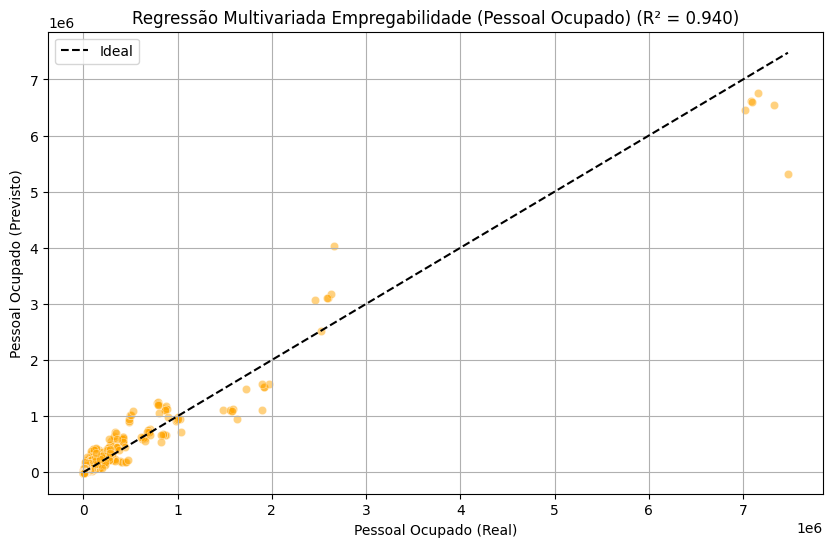

In [38]:
# Gráfico de comparação real vs previsto
plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal')
plt.xlabel('Pessoal Ocupado (Real)')
plt.ylabel('Pessoal Ocupado (Previsto)')
plt.title(f'Regressão Multivariada Empregabilidade (Pessoal Ocupado) (R² = {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()

O que pode ser observado é que o gráfico apresenta a comparação entre os valores reais e previstos de pessoas ocupadas, juntamente com a linha ideal de predição perfeita. Observa-se também uma distribuição relativamente homogênea dos pontos ao redor da linha ideal, com menor dispersão em comparação com modelos univariados. Isso demonstra que a combinação das três variáveis explicativas consegue capturar de forma consistente os padrões de empregabilidade municipal sobre diferentes escalas de municípios.

Por fim, o que se pode concluir acerca da Regressão Multivariada aplicada é que o modelo demonstra uma relação muito forte entre os fatores socioeconômicos analisados e os níveis de empregabilidade municipal.A análise confirma que **quanto maiores as transferências de capital, o PIB e a população municipal** , maiores tendem a ser os níveis de empregabilidade.

# 🔹 Regressão Linear: Produto Interno Bruto (PIB) vs População

Seguindo com a aplicação da Regressão Linear na area Econômica, surgiu a oportunidade de aplicá-la na relação entre o **PIB e a População**, a fim de compreender melhor tal comportamento entre as variáveis, e se cidades com maior população tendem a ter maior PIB. Logo, a análise do modelo permitiu, à equipe, uma visualização mais clara acerca do entendimento da relação geral entre esses atributos.
*   Variável independente: **Populacao** 🧑
*   Variável dependente: **PIB** 💸

=== Regressão (COM TRANSFORMAÇÃO LOGARÍTMICA)
Coeficiente estimado:  1.0389311499678264
Intercepto: 2.5303356270249378
R²: 0.7582610525198218


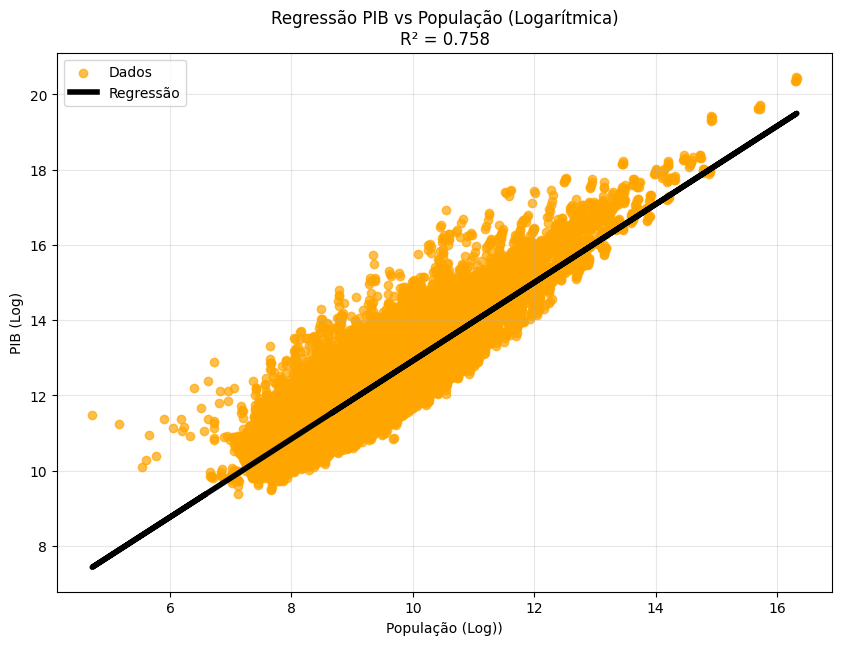

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


dados_limpos = dados[['Populacao', 'PIB']].dropna()
dados_limpos = dados_limpos[(dados_limpos['Populacao'] > 0) & (dados_limpos['PIB'] > 0)]
# Aplicando transformação logarítmica
log_populacao = np.log(dados_limpos["Populacao"])
log_pib = np.log(dados_limpos["PIB"])

X_log = log_populacao.values.reshape(-1, 1)  # reshape
y_log = log_pib.values

# Ajustando o modelo com dados transformados
lm_log = LinearRegression()
lm_log.fit(X_log, y_log)

print("=== Regressão (COM TRANSFORMAÇÃO LOGARÍTMICA)")
print("Coeficiente estimado: ", lm_log.coef_[0])
print("Intercepto:", lm_log.intercept_)
print("R²:", lm_log.score(X_log, y_log))
y_pred_log = lm_log.predict(X_log)

# Gráfico da regressão log-log
plt.figure(figsize=(10, 7))
plt.scatter(X_log, y_log, color='orange', alpha=0.7, label='Dados')
plt.plot(X_log, y_pred_log, color='black', linewidth=4, label='Regressão')
plt.xlabel('População (Log))')
plt.ylabel('PIB (Log)')
plt.title(f'Regressão PIB vs População (Logarítmica)\nR² = {lm_log.score(X_log, y_log):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Diante desses valores, pode-se notar que foi obtido um coeficiente estimado de cerca de **1.038**, que estabelece a seguinte relação:
- Para cada **1%** de aumento na população da cidade, espera-se que haja um acréscimo de cerca de **1,038%** no PIB do município em questão. Ou seja, se a população aumenta proporcionalmente, consequentemente o PIB tende a aumentar na mesma proporção.

Com relação ao Coeficiente de Determinação, o que pode ser afirmado é que aproximadamente **75,8%** da variação do PIB das cidades pode ser explicada pela variação da população. Esse resultado apenas reforça a hipótese de que **municípios mais populosos tendem a apresentar maiores níveis de atividade econômica de forma proporcional**. Todavia, embora os resultados sejam relevantes, é importante ressaltar que o modelo não capta todos os fatores que influenciam no PIB, e a equipe reconhece as limitações inerentes a uma análise baseada em Regressão.

Além disso, a transformação logarítmica utilizada trouxe benefícios importantes ao modelo, como a redução do impacto de outliers e uma melhor linearização da relação entre as variáveis, permitindo uma interpretação mais precisa dos dados econômicos. Logo, conclui-se que tal modelo demonstra uma **forte relação proporcional entre a população e o PIB**, que só reafirma cada vez mais a relação positiva presente, que conversa harmoniosamente com outros pontos abordados anteriormente e estudados no caderno de Economia.